# Truth-level Checks Using Flat CAFs

This notebook produces truth-level plots of primary and secondary particles.
Use this notebook to check if truth information is missing from CAFs

In [5]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

import matplotlib.pyplot as plt
plt.style.use('./cfg/my_custom_plot.mplstyle')

# use these lines on top of your matplotlib script
import matplotlib.ticker
class MyLocator(matplotlib.ticker.AutoMinorLocator):
    def __init__(self, n=4):
        super().__init__(n=n)
matplotlib.ticker.AutoMinorLocator = MyLocator        
 
# Now use matplotlib as usual.       
import matplotlib.pyplot as plt
plt.rcParams["xtick.minor.visible"] =  True
plt.rcParams["ytick.minor.visible"] =  True


from utils import load_dataset, load_keys, ParticleCode
# Load PDG Codes
pdg_tab = ParticleCode()

In [6]:
class mctruth_particle_data():
    ''' This class creates an object
    that will contain truth data of particles
    given its PDG code. It keeps information
    of both primaries and secondaries
    
    Params:
    ------
    pdg_code: int
            PDG code of the particle
    '''
    def __init__(self,pdg_code):

        self.pdg = pdg_code 
        # Primaries 
        self.start_x = []
        self.start_y = []
        self.start_z = []
        self.end_x = []
        self.end_y = []
        self.end_z = []
        self.energy = []
        self.px = []
        self.py = []
        self.pz = []

        # Secondaries 
        self.sec_start_x = []
        self.sec_start_y = []
        self.sec_start_z = []
        self.sec_end_x = []
        self.sec_end_y = []
        self.sec_end_z = []
        self.sec_energy = []
        self.sec_px = []
        self.sec_py = []
        self.sec_pz = []


    def update_data(self,data):
        '''
        This function adds information
        of a particle to the particle_data
        object 

        Params:
        ------

        data: h5 stack containing truth information
        '''
        ev_pdgs = data['rec.mc.nu.prim.pdg']
        mask = np.isin(ev_pdgs,self.pdg)
        masked_pdgs = ev_pdgs[mask]
        if(len(masked_pdgs)==0):
            pass
        else:
            self.start_x.extend(data['rec.mc.nu.prim.start_pos.x'][mask])
            self.start_y.extend(data['rec.mc.nu.prim.start_pos.y'][mask])
            self.start_z.extend(data['rec.mc.nu.prim.start_pos.z'][mask])
            self.end_x.extend(data['rec.mc.nu.prim.end_pos.x'][mask])
            self.end_y.extend(data['rec.mc.nu.prim.end_pos.y'][mask])
            self.end_z.extend(data['rec.mc.nu.prim.end_pos.z'][mask])
            self.energy.extend(data['rec.mc.nu.prim.p.E'][mask]*1000.)
            self.px.extend(data['rec.mc.nu.prim.p.px'][mask]*1000.)
            self.pz.extend(data['rec.mc.nu.prim.p.pz'][mask]*1000.)

        ev_pdgs_sec = data['rec.mc.nu.sec.pdg']
        mask_sec = np.isin(ev_pdgs_sec, self.pdg)
        masked_pdgs_sec = ev_pdgs_sec[mask_sec]
        if(len(masked_pdgs_sec)==0):
            pass
        else:
            self.sec_start_x.extend(data['rec.mc.nu.sec.start_pos.x'][mask_sec])
            self.sec_start_y.extend(data['rec.mc.nu.sec.start_pos.y'][mask_sec])
            self.sec_start_z.extend(data['rec.mc.nu.sec.start_pos.z'][mask_sec])
            self.sec_end_x.extend(data['rec.mc.nu.sec.end_pos.x'][mask_sec])
            self.sec_end_y.extend(data['rec.mc.nu.sec.end_pos.y'][mask_sec])
            self.sec_end_z.extend(data['rec.mc.nu.sec.end_pos.z'][mask_sec])
            self.sec_energy.extend(data['rec.mc.nu.sec.p.E'][mask_sec])
            self.sec_px.extend(data['rec.mc.nu.sec.p.px'][mask_sec]*1000)
            self.sec_pz.extend(data['rec.mc.nu.sec.p.pz'][mask_sec]*1000)

In [7]:
plot_dir = './plots/'

In [8]:
# Load datasets 
n_files = 10
location = "fnal"
df = load_dataset(n_files,location)

Openning MiniRun 5 beta 2.a CAFs
Reading  10  files
Reading /exp/dune/data/users/noeroy/prod/MiniRun5_1E19_RHC/MiniRun5_1E19_RHC.caf.beta2a/CAF.flat/0000000/MiniRun5_1E19_RHC.caf.0000000.CAF.flat.root
Reading /exp/dune/data/users/noeroy/prod/MiniRun5_1E19_RHC/MiniRun5_1E19_RHC.caf.beta2a/CAF.flat/0000000/MiniRun5_1E19_RHC.caf.0000001.CAF.flat.root
Reading /exp/dune/data/users/noeroy/prod/MiniRun5_1E19_RHC/MiniRun5_1E19_RHC.caf.beta2a/CAF.flat/0000000/MiniRun5_1E19_RHC.caf.0000002.CAF.flat.root
Reading /exp/dune/data/users/noeroy/prod/MiniRun5_1E19_RHC/MiniRun5_1E19_RHC.caf.beta2a/CAF.flat/0000000/MiniRun5_1E19_RHC.caf.0000004.CAF.flat.root
Reading /exp/dune/data/users/noeroy/prod/MiniRun5_1E19_RHC/MiniRun5_1E19_RHC.caf.beta2a/CAF.flat/0000000/MiniRun5_1E19_RHC.caf.0000005.CAF.flat.root
Reading /exp/dune/data/users/noeroy/prod/MiniRun5_1E19_RHC/MiniRun5_1E19_RHC.caf.beta2a/CAF.flat/0000000/MiniRun5_1E19_RHC.caf.0000006.CAF.flat.root
Reading /exp/dune/data/users/noeroy/prod/MiniRun5_1E19

In [9]:
# Create function to retrieve this data
# Bring to the discussion thread the issue with NaNs which apparently also comes from ML-Reco 

neutron_data = mctruth_particle_data(pdg_tab.neutron)
muon_data = mctruth_particle_data(pdg_tab.muon)
pi0_data = mctruth_particle_data(pdg_tab.pi0)
pip_data = mctruth_particle_data(pdg_tab.pip)
pim_data = mctruth_particle_data(-1*pdg_tab.pip)
proton_data = mctruth_particle_data(pdg_tab.proton)

for ev in range(len(df)):
    ev_data = df.iloc[ev]
    neutron_data.update_data(ev_data)
    muon_data.update_data(ev_data)
    pi0_data.update_data(ev_data)
    pip_data.update_data(ev_data)
    pim_data.update_data(ev_data)
    proton_data.update_data(ev_data)


    if(ev%1000==0):
        print(f"Processing event {ev}")


Processing event 0
Processing event 1000
Processing event 2000


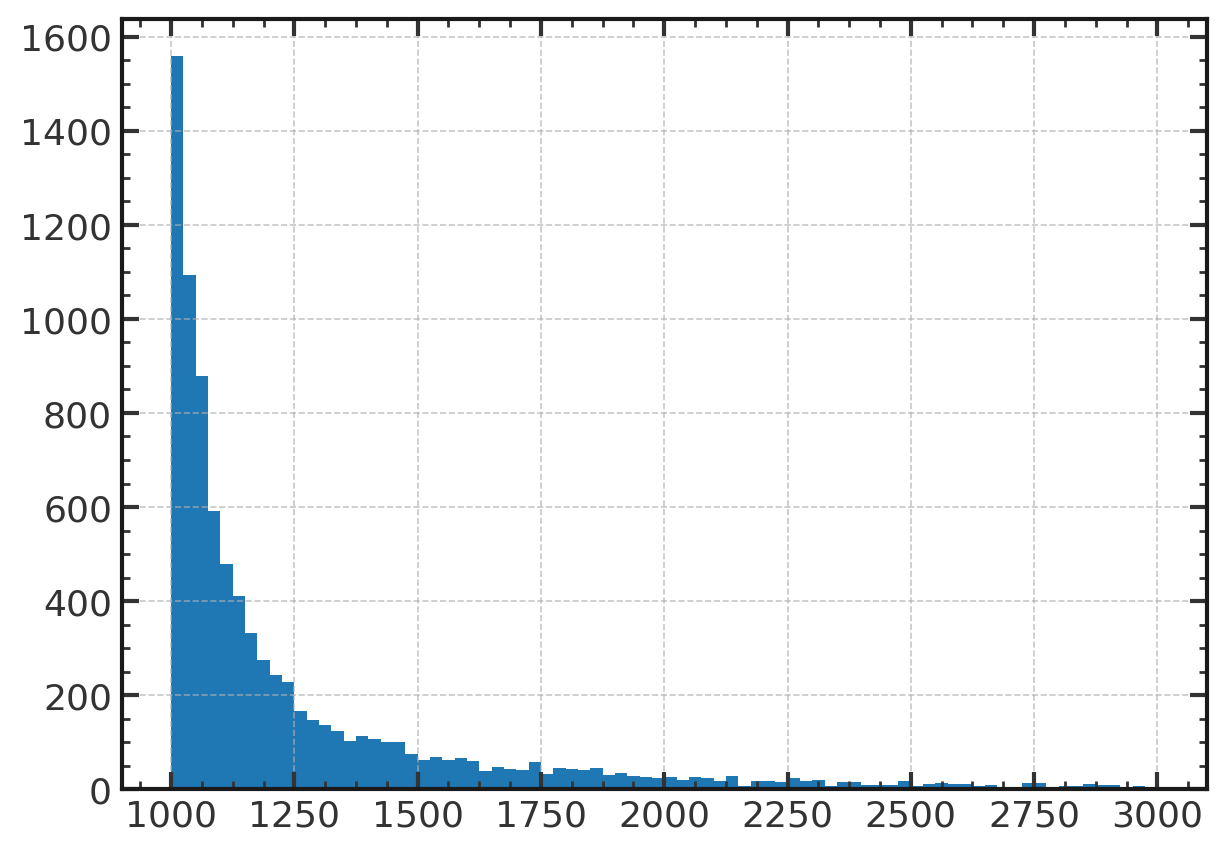

In [10]:
plt.hist(neutron_data.energy,bins=80,range=(1000.,3000.))
plt.show()

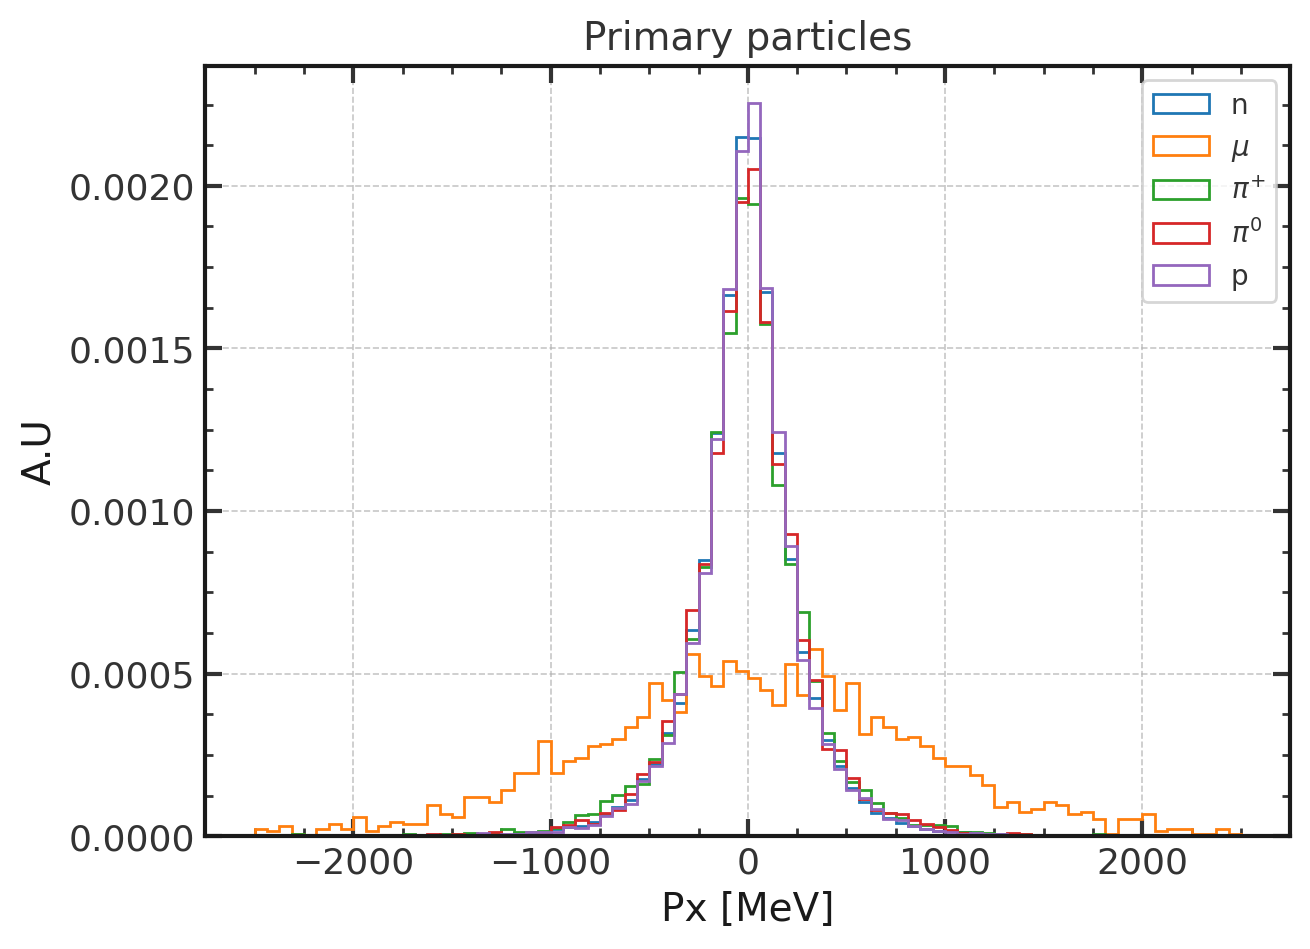

In [11]:
nbins=80
xrange=(-2500,2500)
plt.hist(neutron_data.px,bins=nbins,histtype='step',density=True,label='n',range=xrange)
plt.hist(muon_data.px,bins=nbins,histtype='step',density=True,label=r'$\mu$',range=xrange)
plt.hist(pip_data.px,bins=nbins,histtype='step',density=True,label=r'$\pi^{+}$',range=xrange)
plt.hist(pi0_data.px,bins=nbins,histtype='step',density=True,label=r'$\pi^{0}$',range=xrange)
plt.hist(proton_data.px,bins=nbins,histtype='step',density=True,label=r'p',range=xrange)
plt.legend()
plt.title('Primary particles')
plt.xlabel('Px [MeV]')
plt.ylabel('A.U')
plt.savefig(plot_dir + 'primaries_px.png',bbox_inches="tight")
plt.savefig(plot_dir + 'primaries_px.pdf',bbox_inches="tight")
plt.show()


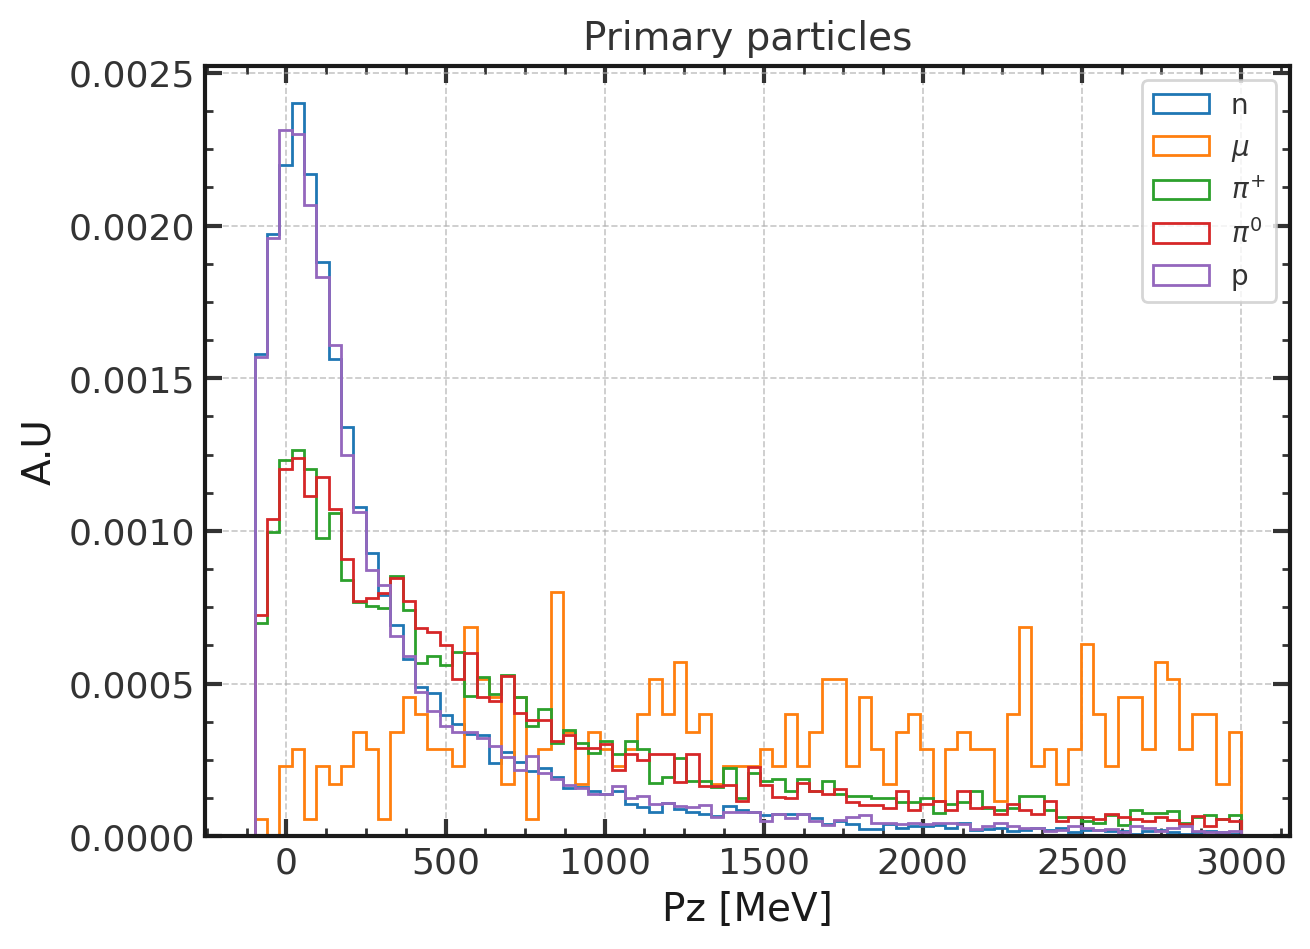

In [12]:
nbins=80
xrange = (-100,3000.)
plt.hist(neutron_data.pz,bins=nbins,histtype='step',density=True,label='n',range=xrange)
plt.hist(muon_data.pz,bins=nbins,histtype='step',density=True,label=r'$\mu$',range=xrange)
plt.hist(pip_data.pz,bins=nbins,histtype='step',density=True,label=r'$\pi^{+}$',range=xrange)
plt.hist(pi0_data.pz,bins=nbins,histtype='step',density=True,label=r'$\pi^{0}$',range=xrange)
plt.hist(proton_data.pz,bins=nbins,histtype='step',density=True,label=r'p',range=xrange)
plt.legend()
plt.title('Primary particles')
plt.xlabel('Pz [MeV]')
plt.ylabel('A.U')
plt.savefig(plot_dir + 'primaries_pz.png',bbox_inches="tight")
plt.savefig(plot_dir + 'primaries_pz.pdf',bbox_inches="tight")
plt.show()

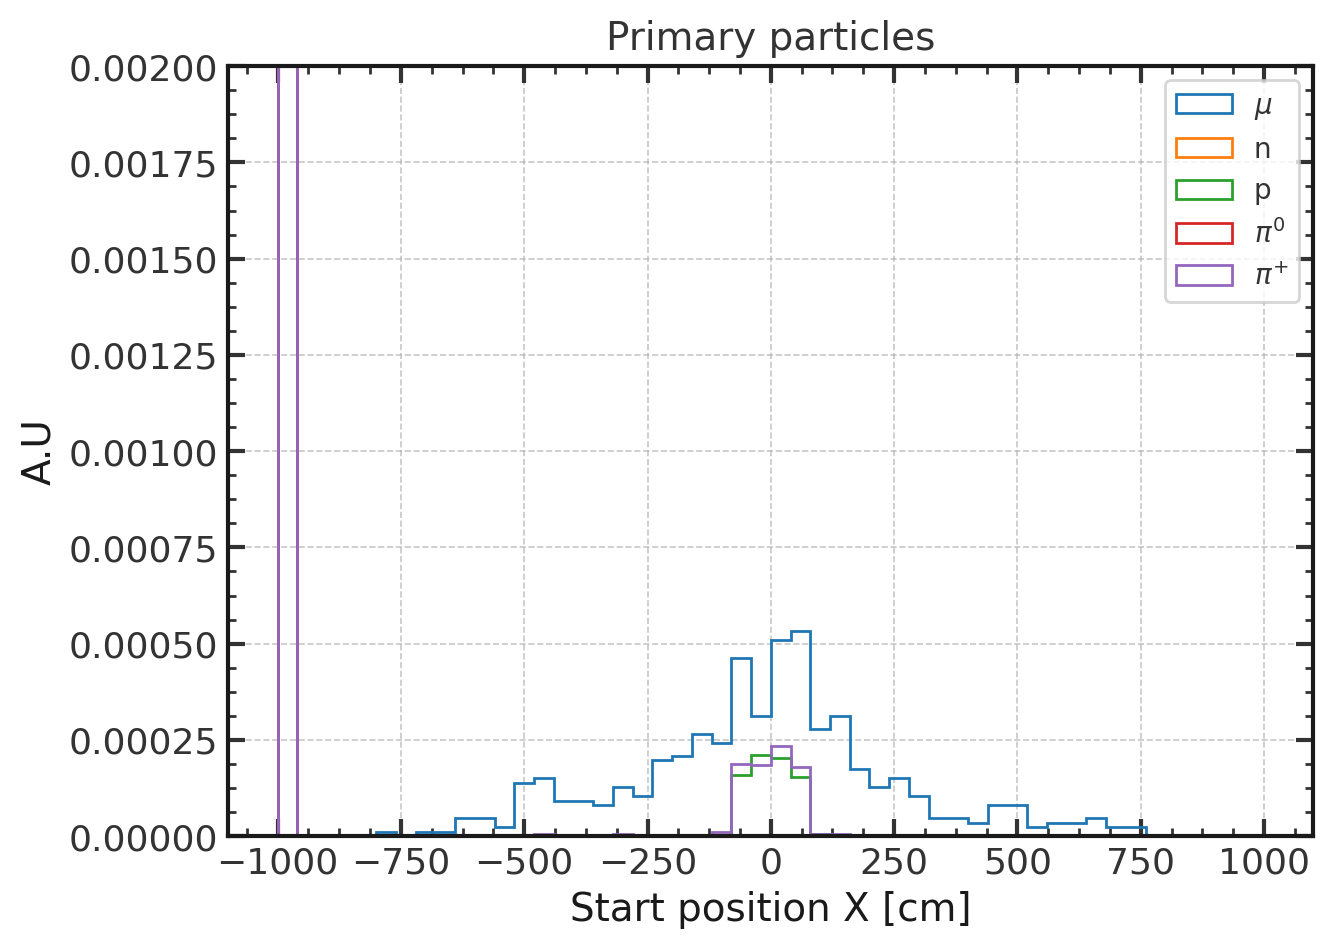

In [13]:
nbins = 50
mu_sx = np.array(muon_data.start_x)
mu_sx = np.nan_to_num(mu_sx,nan=-999)
neutron_sx = np.array(neutron_data.start_x)
neutron_sx = np.nan_to_num(neutron_sx,nan=-999)
pi0_sx = np.array(pi0_data.start_x)
pi0_sx = np.nan_to_num(pi0_sx,nan=-999)
proton_sx = np.array(proton_data.start_x)
proton_sx = np.nan_to_num(proton_sx,nan=-999)
pip_sx = np.array(pip_data.start_x)
pip_sx = np.nan_to_num(pip_sx,nan=-999)



plt.hist(mu_sx,bins=nbins,histtype='step',density=True,label=r'$\mu$',range=(-1000.,1000.))
plt.hist(neutron_sx,bins=nbins,histtype='step',density=True,label='n',range=(-1000.,1000.))
plt.hist(proton_sx,bins=nbins,histtype='step',density=True,label='p',range=(-1000.,1000.))
plt.hist(pi0_sx,bins=nbins,histtype='step',density=True,label=r'$\pi^{0}$',range=(-1000.,1000.))
plt.hist(pip_sx,bins=nbins,histtype='step',density=True,label=r'$\pi^{+}$',range=(-1000.,1000.))
plt.ylim(0.,0.0020)
plt.title('Primary particles')
plt.xlabel('Start position X [cm]')
plt.ylabel('A.U')
plt.legend()
plt.savefig(plot_dir + 'primaries_sx.png',bbox_inches="tight")
plt.savefig(plot_dir + 'primaries_sx.pdf',bbox_inches="tight")
plt.show()

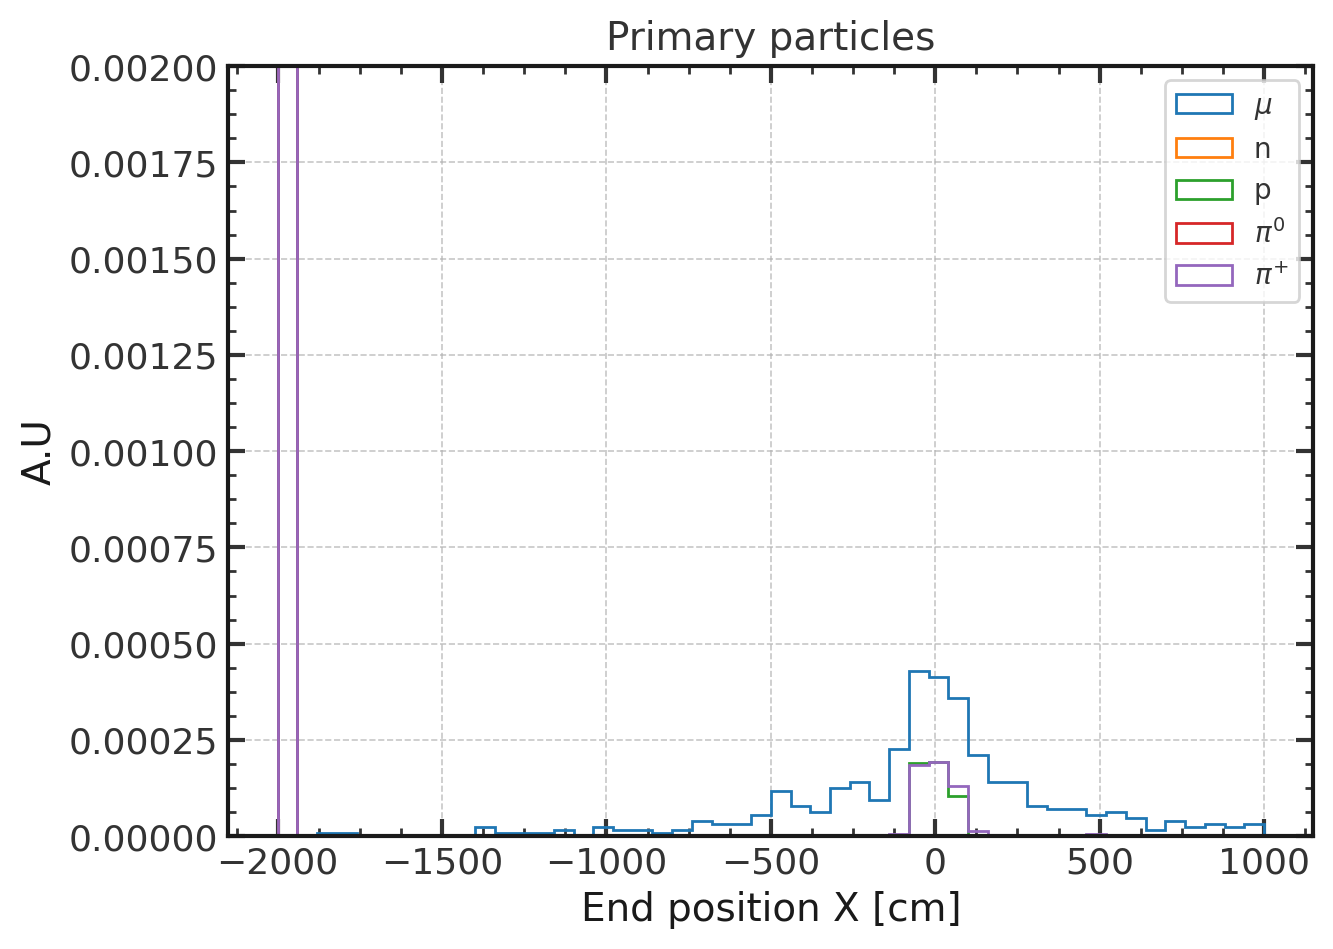

In [14]:
nbins = 50
mu_sx = np.array(muon_data.end_x)
mu_sx = np.nan_to_num(mu_sx,nan=-1999)
neutron_sx = np.array(neutron_data.end_x)
neutron_sx = np.nan_to_num(neutron_sx,nan=-1999)
pi0_sx = np.array(pi0_data.end_x)
pi0_sx = np.nan_to_num(pi0_sx,nan=-1999)
proton_sx = np.array(proton_data.end_x)
proton_sx = np.nan_to_num(proton_sx,nan=-1999)
pip_sx = np.array(pip_data.end_x)
pip_sx = np.nan_to_num(pip_sx,nan=-1999)



plt.hist(mu_sx,bins=nbins,histtype='step',density=True,label=r'$\mu$',range=(-2000.,1000.))
plt.hist(neutron_sx,bins=nbins,histtype='step',density=True,label='n',range=(-2000.,1000.))
plt.hist(proton_sx,bins=nbins,histtype='step',density=True,label='p',range=(-2000.,1000.))
plt.hist(pi0_sx,bins=nbins,histtype='step',density=True,label=r'$\pi^{0}$',range=(-2000.,1000.))
plt.hist(pip_sx,bins=nbins,histtype='step',density=True,label=r'$\pi^{+}$',range=(-2000.,1000.))
plt.ylim(0.,0.0020)
plt.title('Primary particles')
plt.xlabel('End position X [cm]')
plt.ylabel('A.U')
plt.legend()
plt.savefig(plot_dir + 'primaries_ex.png',bbox_inches="tight")
plt.savefig(plot_dir + 'primaries_ex.pdf',bbox_inches="tight")
plt.show()

/exp/dune/app/users/lmoralep/neutron_py_env/lib64/python3.9/site-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


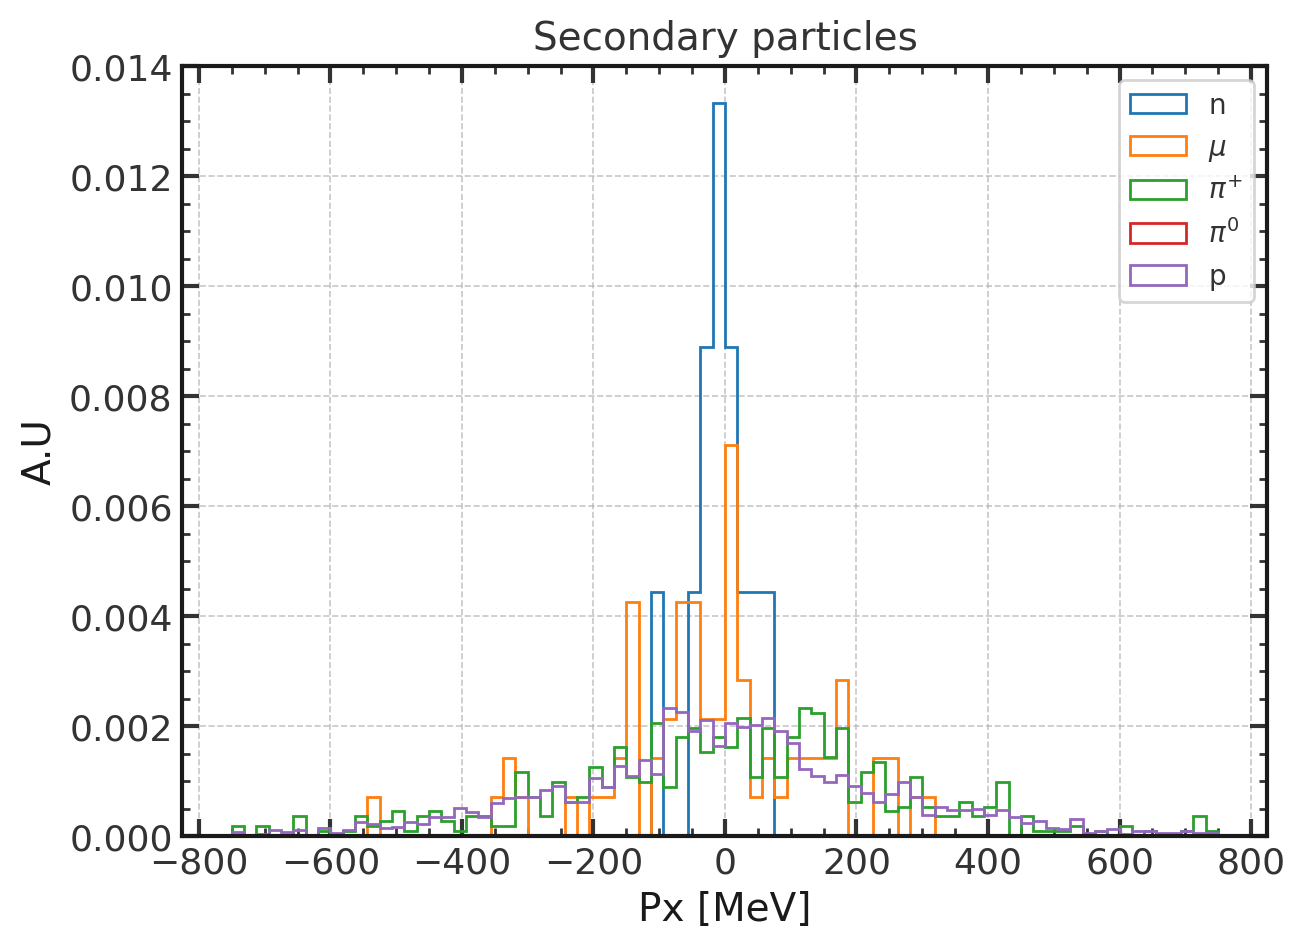

In [15]:
nbins=80
xrange=(-750,750)
plt.hist(neutron_data.sec_px,bins=nbins,histtype='step',density=True,label='n',range=xrange)
plt.hist(muon_data.sec_px,bins=nbins,histtype='step',density=True,label=r'$\mu$',range=xrange)
plt.hist(pip_data.sec_px,bins=nbins,histtype='step',density=True,label=r'$\pi^{+}$',range=xrange)
plt.hist(pi0_data.sec_px,bins=nbins,histtype='step',density=True,label=r'$\pi^{0}$',range=xrange)
plt.hist(proton_data.sec_px,bins=nbins,histtype='step',density=True,label=r'p',range=xrange)
plt.legend()
plt.title('Secondary particles')
plt.xlabel('Px [MeV]')
plt.ylabel('A.U')
plt.savefig(plot_dir + 'secondaries_px.png',bbox_inches="tight")
plt.savefig(plot_dir + 'secondaries_px.pdf',bbox_inches="tight")
plt.show()

/exp/dune/app/users/lmoralep/neutron_py_env/lib64/python3.9/site-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


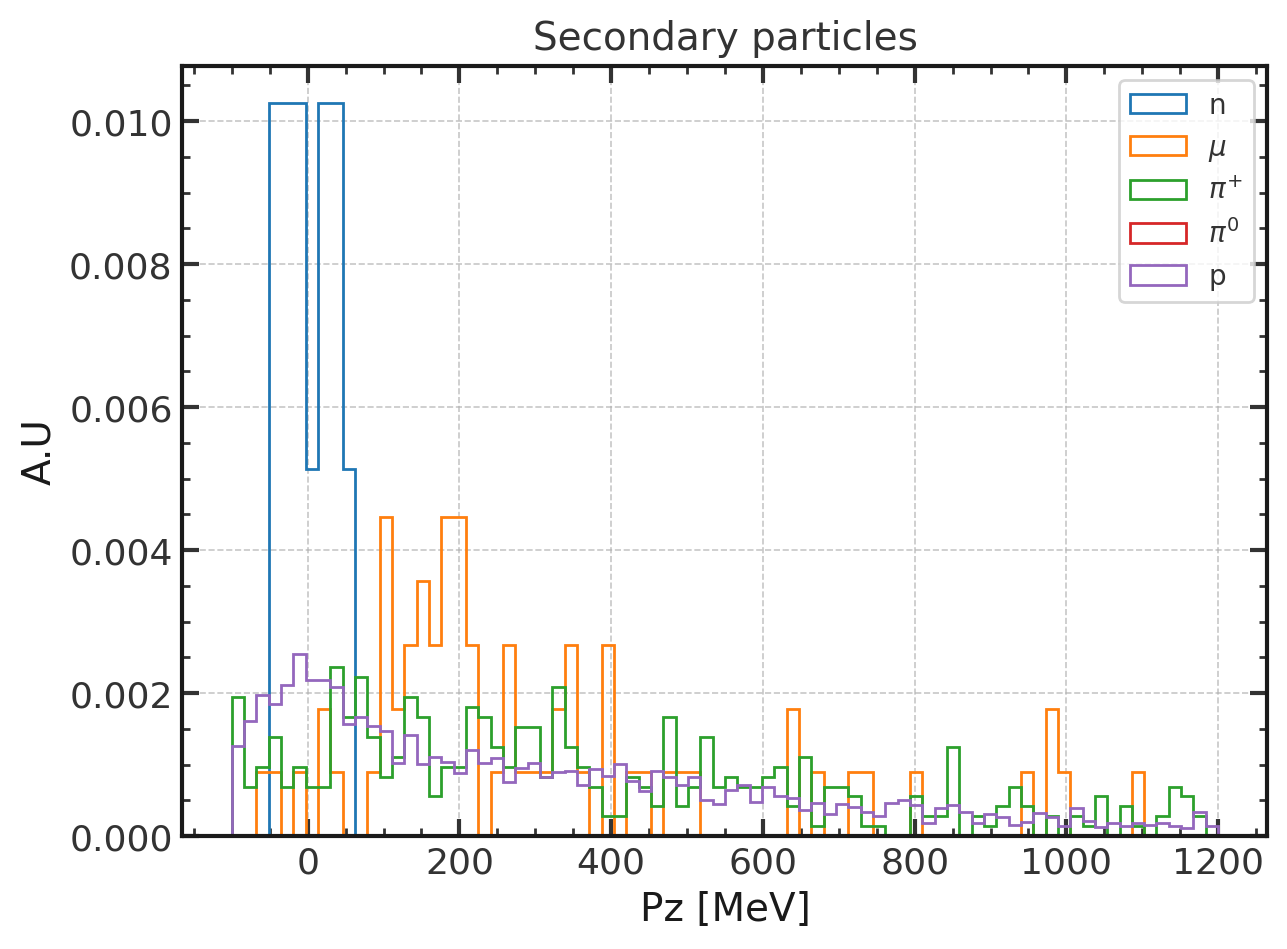

In [16]:
nbins=80
xrange = (-100,1200.)
plt.hist(neutron_data.sec_pz,bins=nbins,histtype='step',density=True,label='n',range=xrange)
plt.hist(muon_data.sec_pz,bins=nbins,histtype='step',density=True,label=r'$\mu$',range=xrange)
plt.hist(pip_data.sec_pz,bins=nbins,histtype='step',density=True,label=r'$\pi^{+}$',range=xrange)
plt.hist(pi0_data.sec_pz,bins=nbins,histtype='step',density=True,label=r'$\pi^{0}$',range=xrange)
plt.hist(proton_data.sec_pz,bins=nbins,histtype='step',density=True,label=r'p',range=xrange)
plt.legend()
plt.title('Secondary particles')
plt.xlabel('Pz [MeV]')
plt.ylabel('A.U')
plt.savefig(plot_dir + 'secondaries_pz.png',bbox_inches="tight")
plt.savefig(plot_dir + 'secondaries_pz.pdf',bbox_inches="tight")
plt.show()

/exp/dune/app/users/lmoralep/neutron_py_env/lib64/python3.9/site-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


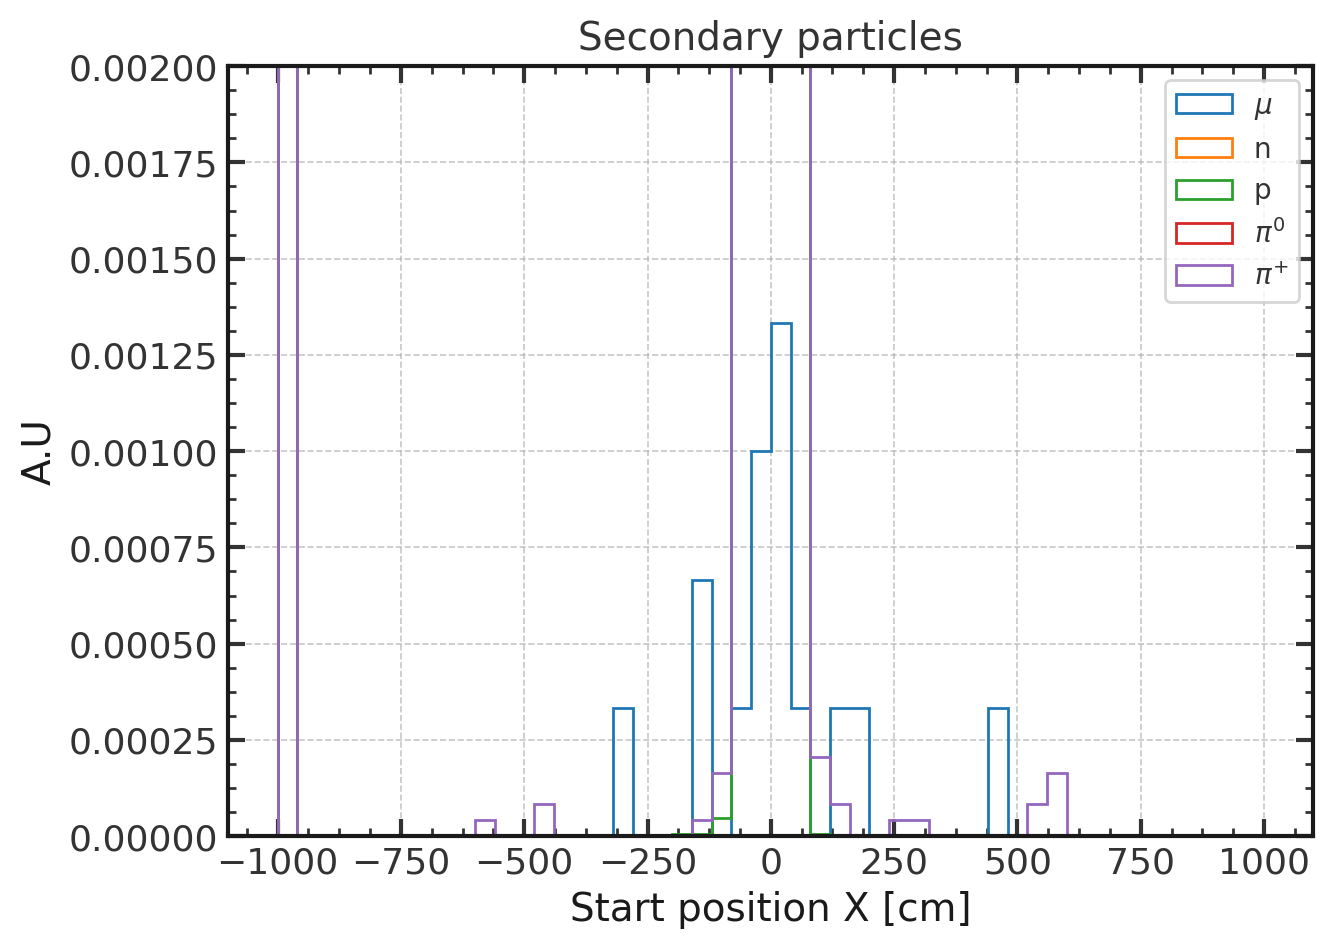

In [17]:
nbins = 50
mu_sx = np.array(muon_data.sec_start_x)
mu_sx = np.nan_to_num(mu_sx,nan=-999)
neutron_sx = np.array(neutron_data.sec_start_x)
neutron_sx = np.nan_to_num(neutron_sx,nan=-999)
pi0_sx = np.array(pi0_data.sec_start_x)
pi0_sx = np.nan_to_num(pi0_sx,nan=-999)
proton_sx = np.array(proton_data.sec_start_x)
proton_sx = np.nan_to_num(proton_sx,nan=-999)
pip_sx = np.array(pip_data.sec_start_x)
pip_sx = np.nan_to_num(pip_sx,nan=-999)



plt.hist(mu_sx,bins=nbins,histtype='step',density=True,label=r'$\mu$',range=(-1000.,1000.))
plt.hist(neutron_sx,bins=nbins,histtype='step',density=True,label='n',range=(-1000.,1000.))
plt.hist(proton_sx,bins=nbins,histtype='step',density=True,label='p',range=(-1000.,1000.))
plt.hist(pi0_sx,bins=nbins,histtype='step',density=True,label=r'$\pi^{0}$',range=(-1000.,1000.))
plt.hist(pip_sx,bins=nbins,histtype='step',density=True,label=r'$\pi^{+}$',range=(-1000.,1000.))
plt.ylim(0.,0.0020)
plt.title('Secondary particles')
plt.xlabel('Start position X [cm]')
plt.ylabel('A.U')
plt.legend()
plt.savefig(plot_dir + 'secondaries_sx.png',bbox_inches="tight")
plt.savefig(plot_dir + 'secondaries_sx.pdf',bbox_inches="tight")
plt.show()

/exp/dune/app/users/lmoralep/neutron_py_env/lib64/python3.9/site-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


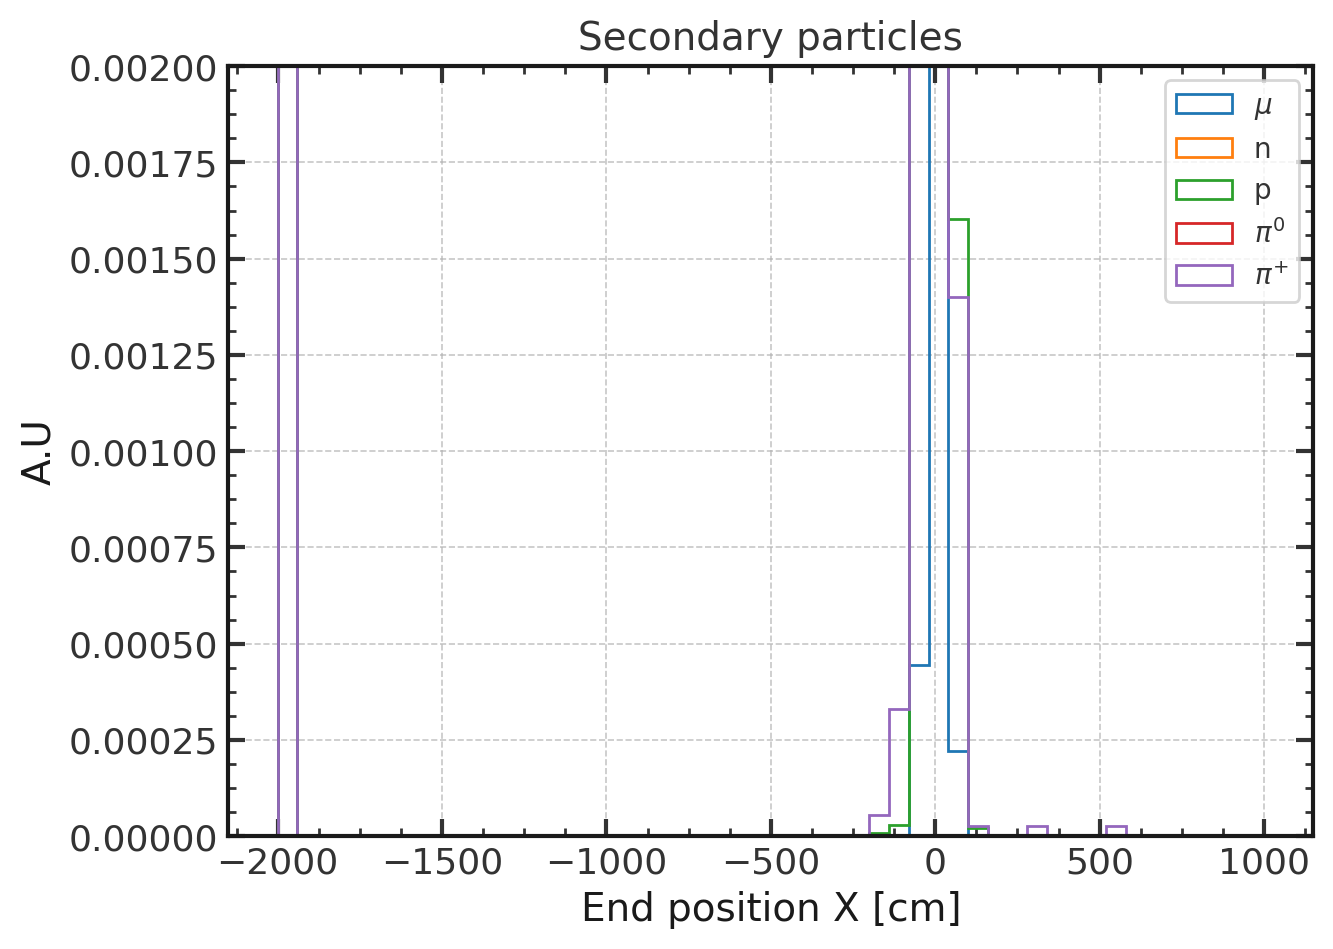

In [18]:
nbins = 50
mu_sx = np.array(muon_data.sec_end_x)
mu_sx = np.nan_to_num(mu_sx,nan=-1999)
neutron_sx = np.array(neutron_data.sec_end_x)
neutron_sx = np.nan_to_num(neutron_sx,nan=-1999)
pi0_sx = np.array(pi0_data.sec_end_x)
pi0_sx = np.nan_to_num(pi0_sx,nan=-1999)
proton_sx = np.array(proton_data.sec_end_x)
proton_sx = np.nan_to_num(proton_sx,nan=-1999)
pip_sx = np.array(pip_data.sec_end_x)
pip_sx = np.nan_to_num(pip_sx,nan=-1999)



plt.hist(mu_sx,bins=nbins,histtype='step',density=True,label=r'$\mu$',range=(-2000.,1000.))
plt.hist(neutron_sx,bins=nbins,histtype='step',density=True,label='n',range=(-2000.,1000.))
plt.hist(proton_sx,bins=nbins,histtype='step',density=True,label='p',range=(-2000.,1000.))
plt.hist(pi0_sx,bins=nbins,histtype='step',density=True,label=r'$\pi^{0}$',range=(-2000.,1000.))
plt.hist(pip_sx,bins=nbins,histtype='step',density=True,label=r'$\pi^{+}$',range=(-2000.,1000.))
plt.ylim(0.,0.0020)
plt.title('Secondary particles')
plt.xlabel('End position X [cm]')
plt.ylabel('A.U')
plt.legend()
plt.savefig(plot_dir + 'secondaries_ex.png',bbox_inches="tight")
plt.savefig(plot_dir + 'secondaries_ex.pdf',bbox_inches="tight")
plt.show()